<a href="https://colab.research.google.com/github/SailokeshParidala/OIBSIP/blob/main/UNEMPLOYMENT_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: UNEMPLOYMENT DATA SET ANALYSIS
submitted by SailokeshParidala

In [ ]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Collecting Data




In [ ]:
df=pd.read_csv("/Unemployment in India.csv")

# Data Analyzing

   Understanding and exploring the data



In [ ]:
#columns in the data
df.columns



Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
#dimensions of the data
print("rows and colums in data:",df.shape)
print("Size of the data:",df.size)

rows and colums in data: (740, 7)
Size of the data: 5180


In [ ]:
#samples of the data
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#random sample from dataset
df.sample()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
132,Jammu & Kashmir,30-06-2020,Monthly,18.97,2049617.0,34.94,Rural


In [ ]:
#datatypes of features
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [ ]:
#describing the dataset by rounding the values
round(df[[' Estimated Unemployment Rate (%)',' Estimated Employed', ' Estimated Labour Participation Rate (%)']]).describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.778378,7.204460e+06,42.641892
std,10.726622,8.087988e+06,8.116715
min,0.000000,4.942000e+04,13.000000
25%,5.000000,1.190404e+06,38.000000
50%,8.000000,4.744178e+06,41.000000
75%,16.000000,1.127549e+07,45.250000
max,77.000000,4.577751e+07,73.000000


In [ ]:
#finding correlation between features
df[[' Estimated Unemployment Rate (%)',' Estimated Employed', ' Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


# Data Pre Processing
Here cleaning,transforming & integrating of data done for analysis

1.Removing Null values

In [ ]:
#null values in data
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df.dropna(axis=0,inplace =True)   #axis=0 means row operstions

In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
print("After removing null values shape of data:",df.shape)


After removing null values shape of data: (740, 7)


2.Renaming the column values

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.rename(columns={' Date':'Date',' Frequency':'Frequency',
                   ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                   ' Estimated Employed':'Estimated Employed',
                   ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [ ]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

3.Checking for duplicate values

In [ ]:
df[df.duplicated()].sum()

Region                                     0.0
Date                                       0.0
Frequency                                  0.0
Estimated Unemployment Rate (%)            0.0
Estimated Employed                         0.0
Estimated Labour Participation Rate (%)    0.0
Area                                       0.0
dtype: float64

4.Converting ['Date'] dtype into datetime dtype

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

5.Creating new columns for date,month,year

In [ ]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month_name()
df['year']=df['Date'].dt.year

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


# Exploratory Data Analysis

In [ ]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

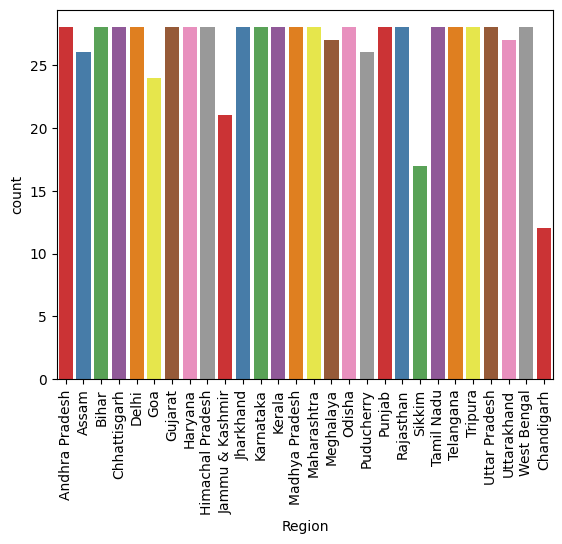

In [ ]:
sns.countplot(x=df['Region'],palette='Set1')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

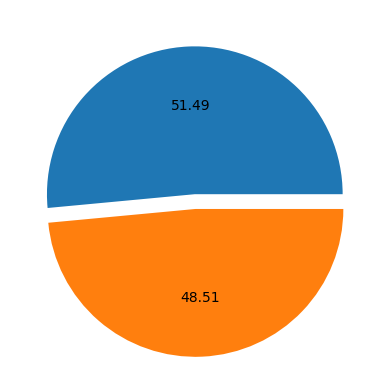

In [ ]:
plt.pie(x=df['Area'].value_counts(),autopct='%0.2f',explode=[0,0.1])
plt.show()

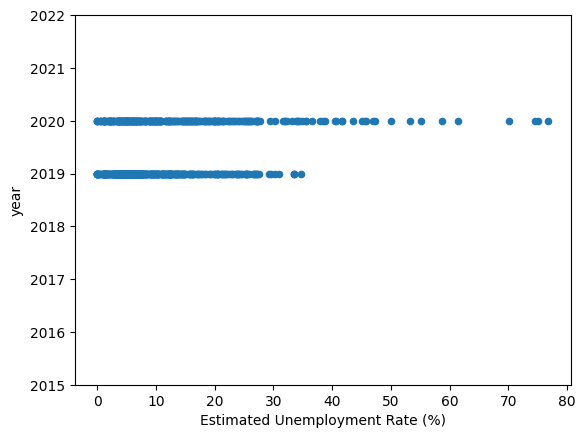

In [ ]:
df.plot(kind='scatter',x='Estimated Unemployment Rate (%)',y='year')
plt.ylim(2015,2022)
plt.show()

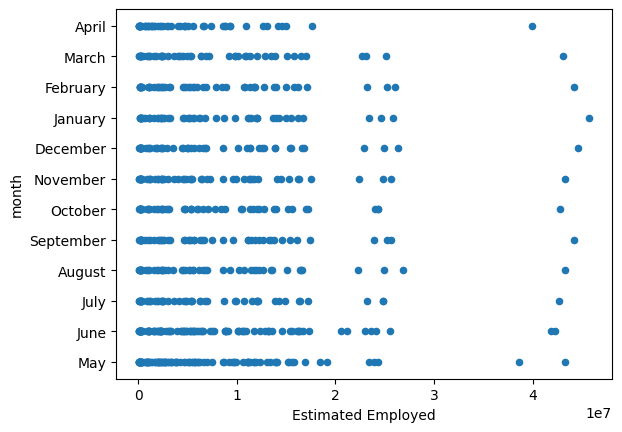

In [ ]:
df.plot(kind='scatter',x='Estimated Employed',y='month')
plt.show()

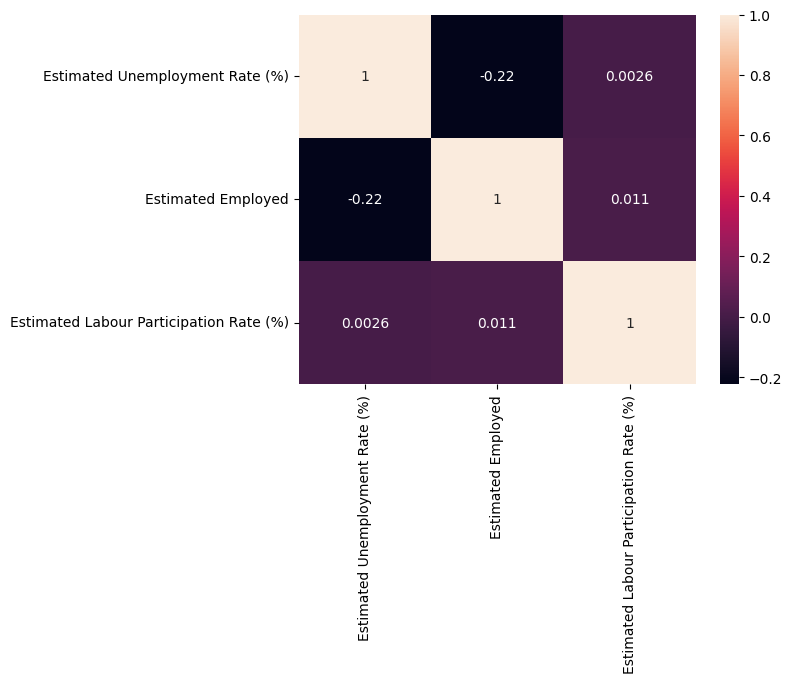

In [ ]:
sns.heatmap(df[['Estimated Unemployment Rate (%)',
                'Estimated Employed',
                'Estimated Labour Participation Rate (%)']].corr(),
            annot=True
           )
plt.show()

# Thank You